In [1]:
import pandas as pd
import numpy as np
import sys
import math
from sklearn.model_selection import train_test_split
import matplotlib.pyplot as plt
import scipy.stats as stats

from IPython.display import Image, display
if 'google.colab' in sys.modules:
    from google.colab import drive
    drive.mount('/content/drive')

In [2]:
%cd '/content/drive/MyDrive/Inteligencia Artificial y Aprendizaje Maquinal/IA - Clases de Práctica/ContenidosPorTemas'

[WinError 3] El sistema no puede encontrar la ruta especificada: "'/content/drive/MyDrive/Inteligencia Artificial y Aprendizaje Maquinal/IA - Clases de Práctica/ContenidosPorTemas'"
c:\Users\yeyer\OneDrive\Desktop\Aprendizaje maquianal practicas\AM_ClasificadorBayes


C:\Users\yeyer\AppData\Roaming\Python\Python311\site-packages\IPython\core\magics\osm.py:393: UserWarning: This is now an optional IPython functionality, using bookmarks requires you to install the `pickleshare` library.
  bkms = self.shell.db.get('bookmarks', {})


# Clasificador de Bayes

A diferencia de los clasificadores vistos hasta ahora, el clasificador de Bayes es de **tipo estadístico**.

Podemos definir un clasificador estadístico como un conjunto de funciones discriminantes $g_i$. El un número de funciones $g_i$ es igual al número de clases $c$ presentes en los datos.

Cada una de estas funciones $g_i$ va a tomar como entrada un patrón y va a devolver como salida un número real que será el máximo valor entre las salidas de cada función discriminante. Este número representa la probabilidad de pertenencia del patrón a una clase.

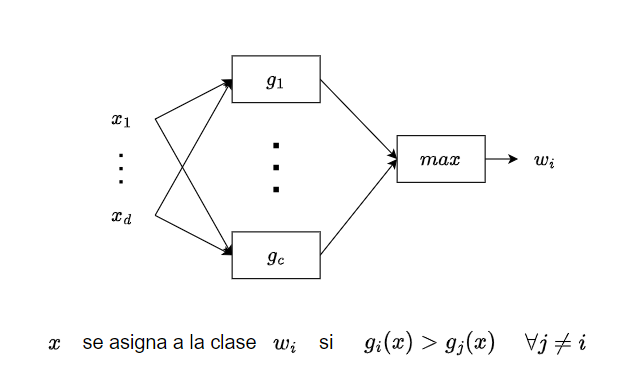

In [3]:
display(Image(filename='./2_imagenes/funciones discriminantes.png', width=600))

El clasificador de Bayes utiliza como función discriminante, las **probabilidades a posteriori**.
A continuación vamos a repasar algunos conceptos para entender esta función discriminante.

### **Probabilidad a priori $P(w_i)$**: “Probabilidad de observar la etiqueta sin saber cual es el valor de la muestra”

se calcula como la proporción de muestras de $w_i$ respecto al total

- $0 \leq P(w_i) \leq 1, \text{ para }i=1,…,c$
- $\sum\limits_{1=1}^{c}P(w_1)=1$

***Ej. Cuál es la probabilidad de encontrar individuos anémicos en una población de individuos anémicos + sanos***

### **Densidad condicional $P(x|w_i)$ (likelihood)**: “Probabilidad de observar una muestra x sabiendo de qué clase la estoy sacando (la etiqueta)”


***Ej. Tengo 2 grupos etiquetados con sanos y anémicos, cuál es la probabilidad de sacar un conteo de glóbulos rojos 2.000.000, conociendo la clase a la que pertenece la muestra.***

### **Probabilidad conjunta $P(x,w_i)$**: “Probabilidad de observar la muestra x con la etiqueta $w_i$”

$$
P(x,w_i) = P(w_i)P(x|w_i)
$$

***Ej. Ahora tengo todas las muestras de los 2 grupos mezcladas, cuál es la probabilidad de sacar un conteo de glóbulos rojos de 2.000.000 y que sea un individuo sano***

### **Probabilidad incondicional $P(x)$ o Marginal** : “Probabilidad de observar la muestra x sin saber cuál es su etiqueta”

Suma de las probabilidades conjuntas para cada clase

$$
p(x) = \sum\limits_{j=1}^{c}P(x,w_j) = \sum\limits_{j=1}^{c}P(w_j) P(x|w_j)
$$
***Ej. cuál es la probabilidad de sacar un conteo de glóbulos rojos de 2.000.000 sin importar la clase***

### **Probabilidad a posteriori $P(w_i|x)$**: “Probabilidad de observar una etiqueta $w_i$  conociendo el valor de la muestra x”

Se obtiene mediante la regla de Bayes:

$$
P(w_i|x) = \frac{P(x|w_i)P(w_i)}{P(x)} = \frac{P(x|w_i)P(w_i)}{\sum\limits_{j=1}^{c}P(x|w_j)P(w_j)}
$$

# Clasificador Bayes

Es un clasificador que utiliza las **probabilidades a posteriori** como funciones discriminantes

La salida del clasificador será la clase que maximiza la expresión:

$$g_i(x) = P(w_i|x) = \frac{P(x|w_i)P(w_i)}{P(x)}$$

## Ejemplo de Aplicación: OCR de dígitos manuscritos 0 y 1

Vamos a ver un ejemplo simple de la aplicación de un clasificador de Bayes para el reconocimiento óptico de caracteres (OCR) de 2 dígitos manuscritos 0 y 1.

A continuación tenemos las imágenes binarizadas de ambos dígitos.

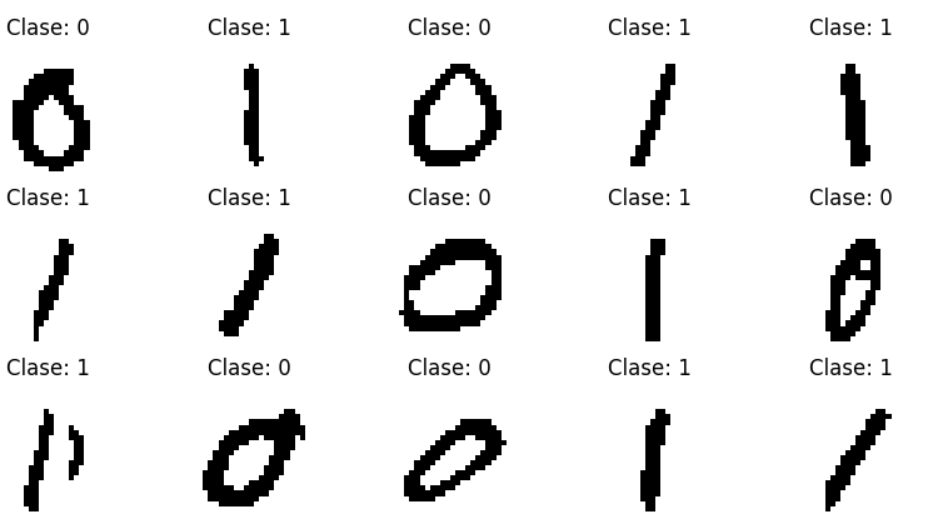

In [4]:
# Figura 1
display(Image(filename='./2_imagenes/digitos_0_1.png', width=800))

Estos dígitos inicialmente están guardados en vectores de dimensión (1,784) que conforman imágenes de 28x28 píxeles con intensidades entre 0 y 255. A los cuales se les aplicó un umbral de 127 para binarizarlas.

Posteriormente, para simplificar la tarea de clasificación, se transforman los datos a una única dimensión. Para esto, se mide sobre cada dígito el **brillo global** sumando el número de píxeles en blanco que posee la imagen.

Esta medida para cada dígito permitirá separar las clases de forma simple como se puede ver en los siguientes histogramas del brillo global para cada dígito:

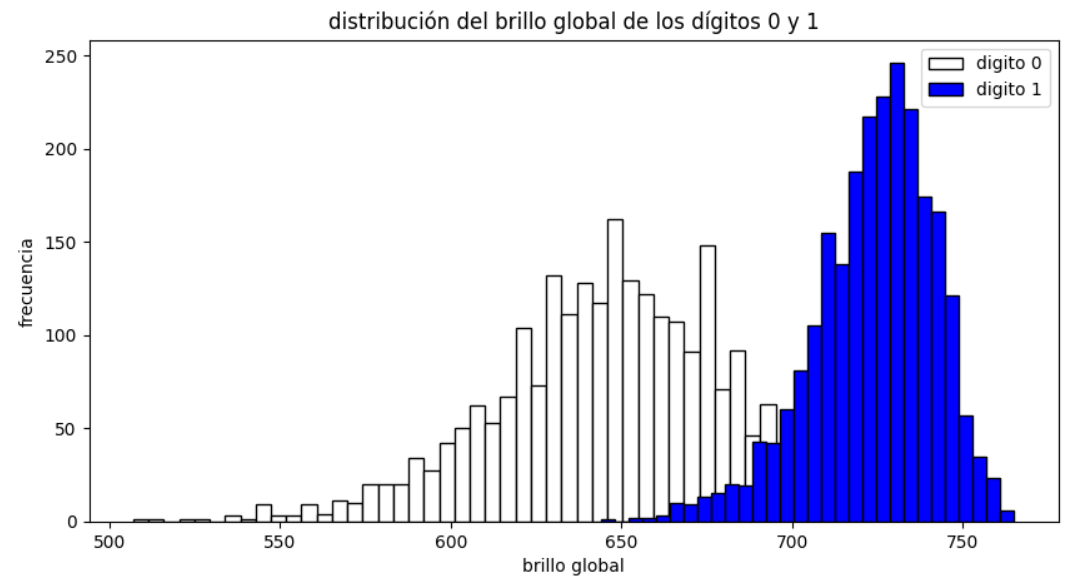

In [5]:
# Figura 2
display(Image(filename='./2_imagenes/brillo_global_hist.png', width=800))

De los histogramas anteriores, es notable la diferencia en los valores del brillo global de estos dígitos.

Como información *a priori* para este problema, conocemos que el número de dígitos para cada clase es el mismo, por lo tanto se cumple que las **probabilidades a priori** son:
$$p(0) = p(1) = 0.5$$

Para las **probabilidades condicionales** se puede utilizar una *función de densidad de probabilidad* que se aproxime las distribuciones de los datos de estos histogramas.

Como podemos ver, ambas distribuciones pueden aproximarse mediante distribuciones normales o gaussianas.

A continuación, se muestran las densidades de los histogramas ( $frecuencia/ (n_i * bin\_width)$ ) junto con las funciones de densidad de probabilidad gaussianas.

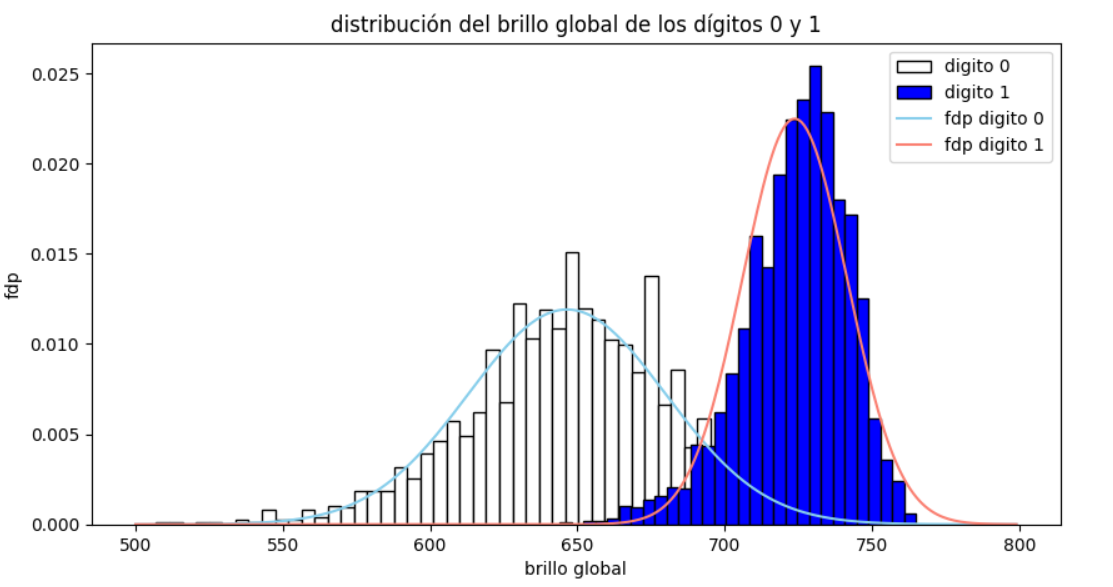

In [6]:
#Figura 3
display(Image(filename='./2_imagenes/fdp.png', width=900))

A la izquierda podemos observar las probabilidades condicionales y a la derecha las probabilidades conjuntas y la probabilidad marginal resultante

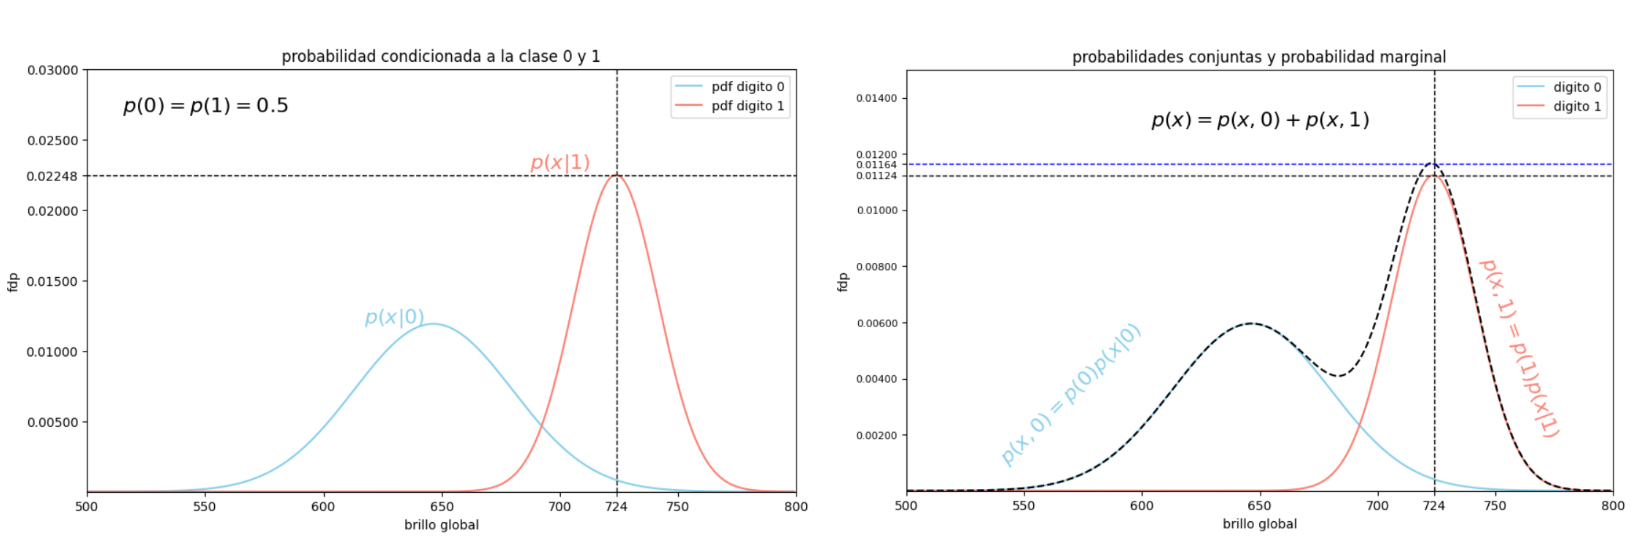

In [7]:
#Figura 4
display(Image(filename='./2_imagenes/prob_conjunta_marginal.png', width=1500))

Luego, con las probabilidades conjuntas por clase y la probabilidad marginal podemos obtener la probabilidad a posteriori para cada clase

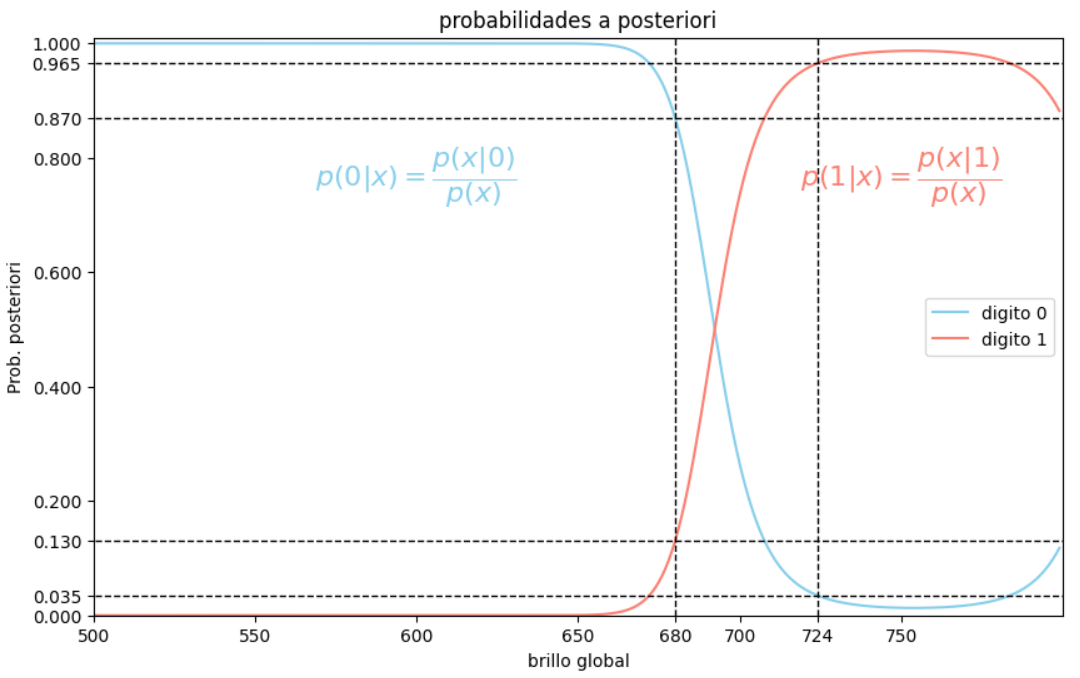

In [8]:
#Figura 5
display(Image(filename='./2_imagenes/posteriori.png', width=900))

## Actividades Prácticas

En el archivo `digitos_0_1.csv` de la carpeta `1_datos` se tienen dígitos manuscritos del 0 y 1. Reproduzca el análisis anterior para obtener un clasificador de Bayes que use como probabilidad condicional una distribución normal.


### 1. Carga y división de los datos

Cargue los datos y sepárelos en entrenamiento y prueba (20%). Use `random_state=0`. Separe predictores y etiquetas.

In [9]:
# Load the data
data = pd.read_csv('1_datos/digitos_0_1.csv')

# Separate predictors and labels
X = data.drop('target', axis=1)
y = data['target']



In [10]:
# Split the data into training and test sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.1, random_state=0, stratify = y)

### 2. Procesamiento de datos

Binarice los datos usando el umbral 127, de modo que las intensidades superiores al umbral sean iguales a 1 y las menores iguales a 0.

In [11]:
# Binarize the data using the threshold 127
X_train_binarized = (X_train > 127).astype(int)
X_test_binarized = (X_test > 127).astype(int)

### 3. Visualización de datos

Visualice los 15 primeros dígitos del conjunto de entrenamiento. Puede utilizar la función [imshow](https://matplotlib.org/stable/api/_as_gen/matplotlib.pyplot.imshow.html) de matplotlib con el parámetro `cmap='binary'`

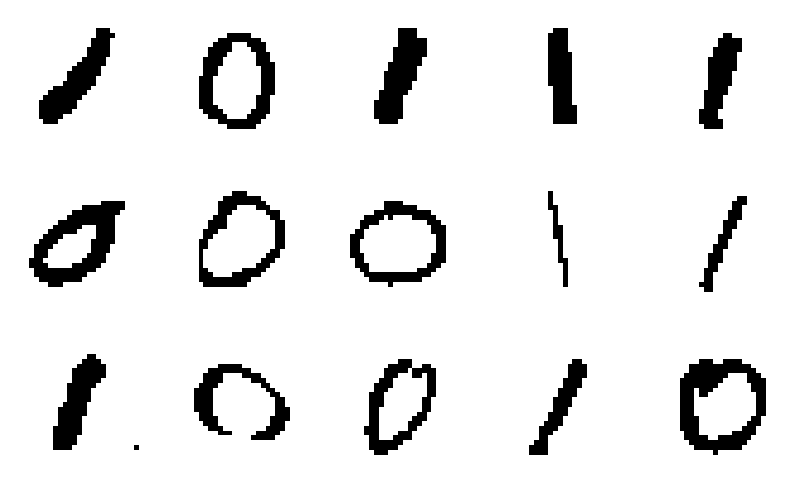

In [12]:
# Visualize the first 15 digits of the training set
fig, axes = plt.subplots(3, 5, figsize=(10, 6))
for i, ax in enumerate(axes.flat):
    ax.imshow(X_train_binarized.iloc[i].values.reshape(28, 28), cmap='binary')
    ax.axis('off')
plt.show()

### 4. Cálculo de brillo global

Implemente una función para calcular el brillo global de una imagen que devuelva la suma de los píxeles blancos (iguales a 0). Aplique esta función a cada dígito del conjunto de datos (de entrenamiento y prueba) para transformarlo a un conjunto de una única característica. Puede utilizar la función [np.apply_along_axis](https://numpy.org/doc/stable/reference/generated/numpy.apply_along_axis.html)

Grafique la distribución del brillo global para cada clase (dígito 0 y dígito 1) usando histogramas, replicando la Figura2.

In [13]:
def calcular_brillo_global(imagen):
    return np.sum(imagen == 0)

# Aplicar la función a cada dígito del conjunto de datos de entrenamiento y prueba
brillo_global_train = np.apply_along_axis(calcular_brillo_global, 1, X_train_binarized.values)
brillo_global_test = np.apply_along_axis(calcular_brillo_global, 1, X_test_binarized.values)

# Convertir los resultados a DataFrames manteniendo el índice original
X_train_brillo = pd.DataFrame(brillo_global_train, columns=['brillo_global'], index=X_train_binarized.index)
X_test_brillo = pd.DataFrame(brillo_global_test, columns=['brillo_global'], index=X_test_binarized.index)



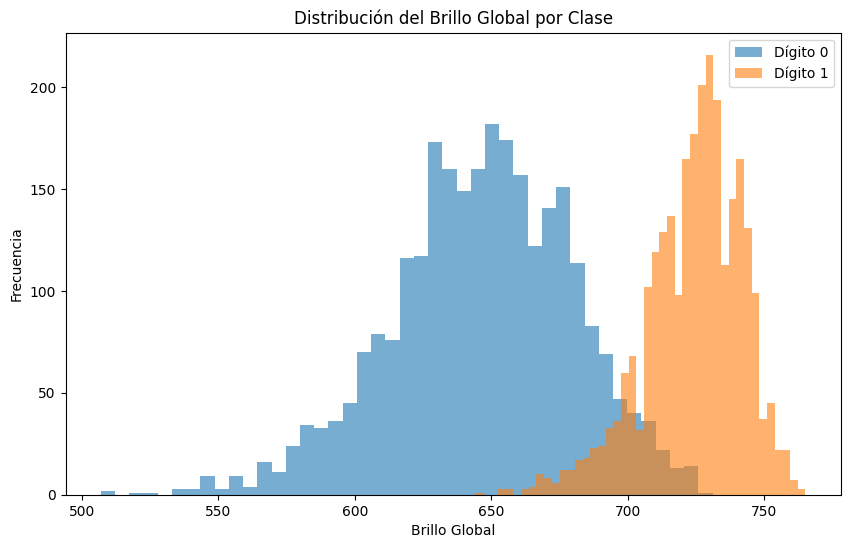

In [14]:
# Graficar la distribución del brillo global para cada clase usando histogramas

# Separar el brillo global por clase
brillo_global_0 = X_train_brillo[y_train == 0]
brillo_global_1 = X_train_brillo[y_train == 1]

# Crear los histogramas
plt.figure(figsize=(10, 6))
plt.hist(brillo_global_0['brillo_global'], bins=43 , alpha=0.6, label='Dígito 0')
plt.hist(brillo_global_1['brillo_global'], bins=43, alpha=0.6, label='Dígito 1')
plt.xlabel('Brillo Global')
plt.ylabel('Frecuencia')
plt.title('Distribución del Brillo Global por Clase')
plt.legend()
plt.show()

### 5. Cálculo de la Probabilidad a Priori

Calcule la probabilidad a priori para cada clase a partir del conjunto de datos de entrenamiento. También obtenga la media y el desvío estándar de los datos (de entrenamiento) para cada clase `mean_0`, `std_0`, `mean_1` y `std_1`.

In [15]:
# Calcular la probabilidad a priori para cada clase
prior_0 = (y_train == 0).mean()
prior_1 = (y_train == 1).mean()

# Calcular la media y el desvío estándar del brillo global para cada clase
mean_0 = brillo_global_train[y_train == 0].mean()
std_0 = brillo_global_train[y_train == 0].std()
mean_1 = brillo_global_train[y_train == 1].mean()
std_1 = brillo_global_train[y_train == 1].std()

print(f"Probabilidad a priori de la clase 0: {prior_0}")
print(f"Probabilidad a priori de la clase 1: {prior_1}")
print(f"Media del brillo global para la clase 0: {mean_0}")
print(f"Desvío estándar del brillo global para la clase 0: {std_0}")
print(f"Media del brillo global para la clase 1: {mean_1}")
print(f"Desvío estándar del brillo global para la clase 1: {std_1}")

Probabilidad a priori de la clase 0: 0.5
Probabilidad a priori de la clase 1: 0.5
Media del brillo global para la clase 0: 646.4418518518519
Desvío estándar del brillo global para la clase 0: 33.384027400233386
Media del brillo global para la clase 1: 723.9174074074074
Desvío estándar del brillo global para la clase 1: 17.85918771588048


### 6. Cálculo de la Probabilidad Condicional

Grafique los histogramas del brillo global de las 2 clases (Figura 2)

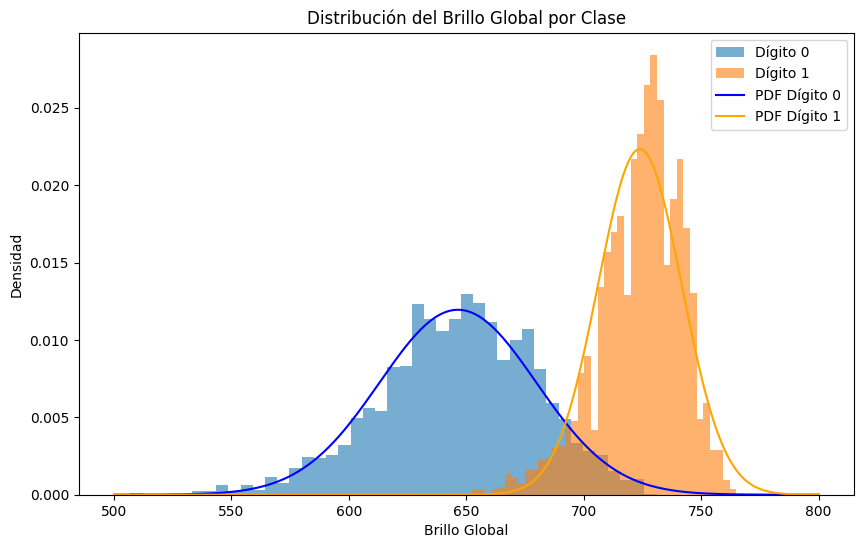

In [16]:
# Graficar la distribución del brillo global para cada clase usando histogramas

# Separar el brillo global por clase
brillo_global_0 = X_train_brillo[y_train == 0]
brillo_global_1 = X_train_brillo[y_train == 1]

# Crear los histogramas
plt.figure(figsize=(10, 6))
plt.hist(brillo_global_0['brillo_global'], bins=43 , alpha=0.6, label='Dígito 0', density=True)
plt.hist(brillo_global_1['brillo_global'], bins=43, alpha=0.6, label='Dígito 1', density=True)

# Graficar las funciones de densidad probabilística gaussianas
x_values = np.linspace(500, 800, 300)
pdf_0 = stats.norm.pdf(x_values, mean_0, std_0)
pdf_1 = stats.norm.pdf(x_values, mean_1, std_1)
plt.plot(x_values, pdf_0, label='PDF Dígito 0', color='blue')
plt.plot(x_values, pdf_1, label='PDF Dígito 1', color='orange')

plt.xlabel('Brillo Global')
plt.ylabel('Densidad')
plt.title('Distribución del Brillo Global por Clase')
plt.legend()
plt.show()

Utilice la media y desvío por clase para aproximar las distribuciones de los datos usando funciones de densidad probabilística (pdf: probability density function) gaussiana. Estas representarían las probabilidades condicionales a cada clase. Utilice para estas distribuciones la función [scipy.stats.norm.pdf](https://docs.scipy.org/doc/scipy/reference/generated/scipy.stats.norm.html).

Implemente una función para calcular la probabilidad condicional de un valor o valores de brillo `X` a partir de la media `mean_d` y el desvío `std_d`correspondiente a la pdf de la clase.

Grafíque las pdf de ambas clases superpuestas junto con los histogramas (con el parámetro `density=True`) anteriores replicando la Figura 3.

In [17]:
def prob_condicional(X, mean_d, std_d):
    exponent = math.exp(-0.5 * ((X - mean_d) / std_d) ** 2)
    return (1 / (std_d * math.sqrt(2 * math.pi))) * exponent

In [18]:
def prob_condicional(X, mean_d, std_d):
    exponent = math.exp (-((X - mean_d)**2) / (2* std_d**2))
    return (1 / (math.sqrt(2 * std_d**2 * math.pi))) * exponent

In [19]:
# test prob_condicional
mean_d = 723.7558
std_d = 17.744
assert math.isclose(prob_condicional(724, mean_d, std_d), 0.02248, rel_tol=1e-4)

In [20]:
def prob_condicional_lista(X_list, mean_d, std_d):
    return [prob_condicional(X, mean_d, std_d) for X in X_list]

# Ejemplo de uso
X_list = [720, 727, 710]
mean_d = 723.7558
std_d = 17.744
probabilidades = prob_condicional_lista(X_list, mean_d, std_d)
print(probabilidades)

[0.02198516890480189, 0.02211055831675789, 0.01664772124446576]


Replique la gráfica izquierda de la Figura 4, Verifique el resultado del valor de brillo marcado en la gráfica (724).

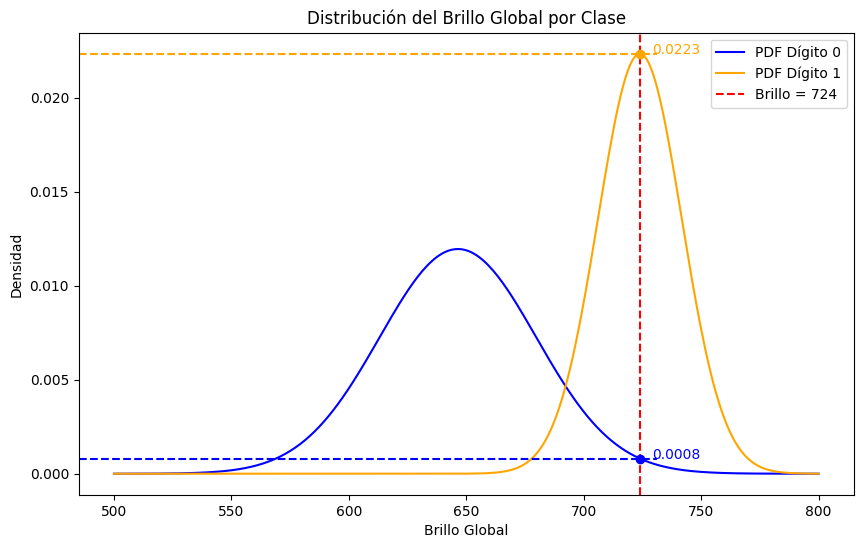

In [21]:
# Crear la figura
plt.figure(figsize=(10, 6))

# Graficar las funciones de densidad probabilística gaussianas
x_values = np.linspace(500, 800, 300)
pdf_0 = np.array(prob_condicional_lista(x_values, mean_0, std_0))
pdf_1 = np.array(prob_condicional_lista(x_values, mean_1, std_1))
plt.plot(x_values, pdf_0, label='PDF Dígito 0', color='blue')
plt.plot(x_values, pdf_1, label='PDF Dígito 1', color='orange')

# Obtener las probabilidades en x=724 para ambas distribuciones
y_0 = prob_condicional(724, mean_0, std_0)
y_1 = prob_condicional(724, mean_1, std_1)

# Marcar el punto 724 en ambas distribuciones con un marcador
plt.scatter(724, y_0, color='blue', zorder=5)  # Para la curva del Dígito 0
plt.scatter(724, y_1, color='orange', zorder=5)  # Para la curva del Dígito 1

# Añadir una línea vertical desde el eje x=724
plt.axvline(x=724, color='red', linestyle='--', label='Brillo = 724')

# Dibujar líneas horizontales desde el punto hasta el eje y (para las probabilidades)
plt.axhline(y=y_0, xmin=0, xmax=(724-500)/(800-500), color='blue', linestyle='--')  # Para la curva del Dígito 0
plt.axhline(y=y_1, xmin=0, xmax=(724-500)/(800-500), color='orange', linestyle='--')  # Para la curva del Dígito 1

# Etiquetar las probabilidades en el gráfico
plt.text(724 + 5, y_0, f'{y_0:.4f}', color='blue', ha='left')
plt.text(724 + 5, y_1, f'{y_1:.4f}', color='orange', ha='left')

# Etiquetas para los ejes
plt.xlabel('Brillo Global')
plt.ylabel('Densidad')
plt.title('Distribución del Brillo Global por Clase')

# Agregar leyenda
plt.legend()

# Mostrar gráfico
plt.show()

### 7.Cálculo de la Probabilidad Conjunta

Calcule la probabilidad conjunta de cada clase usando la probabilidad a priori y la función de probabilidad condicional implementada previamente.

In [22]:
def prob_conjunta(X, priori, mean_d, std_d):
    return priori * prob_condicional(X, mean_d, std_d)

def prob_conjunta_lista(X, priori, mean_d, std_d):
    return [priori * prob for prob in prob_condicional_lista(X, mean_d, std_d)]

# Ejemplo de uso
prob_conjunta_0 = prob_conjunta_lista([724,567,350], prior_0, mean_0, std_0)
print(f"Probabilidad conjunta de que el brillo global sea 724, 567, 350 y sea un dígito 0: {prob_conjunta_0}")

Probabilidad conjunta de que el brillo global sea 724, 567, 350 y sea un dígito 0: [0.00040209646222771797, 0.0003521341533762635, 4.5111376053492094e-20]


In [35]:
# test prob_conjunta
priori = 0.5
mean_d = 723.7558
std_d = 17.744
assert math.isclose(prob_conjunta(724, priori, mean_d, std_d), 0.01124, rel_tol=1e-4)

### 8. Cálculo de la Probabilidad Marginal

Calcule la probabilidad marginal a partir de la suma de las probabilidades conjuntas. Implemente una función que reciba tuplas para las probabilidades a priori, las medias y los desvíos por clase.

In [24]:
def prob_marginal(X, p_prioris, mean_ds, std_ds):
    prob_marg = 0
    for p_priori, mean_d, std_d in zip(p_prioris, mean_ds, std_ds):
        prob_marg += prob_conjunta(X, p_priori, mean_d, std_d)
    return prob_marg

In [25]:
def prob_marginal_lista(X_list, p_prioris, mean_ds, std_ds):
    prob_marg_list = []
    for X in X_list:
        prob_marg = 0
        for p_priori, mean_d, std_d in zip(p_prioris, mean_ds, std_ds):
            prob_marg += prob_conjunta(X, p_priori, mean_d, std_d)
        prob_marg_list.append(prob_marg)
    return prob_marg_list

# Ejemplo de uso
X_list = [720, 727, 710]
prioris = (0.5, 0.5)
mean_ds = (646.443, 723.7558)
std_ds = (33.5019, 17.744)
prob_marginales = prob_marginal_lista(X_list, prioris, mean_ds, std_ds)
print(prob_marginales)
# Calcular la probabilidad marginal para los datos de prueba
prob_marginal_test = prob_marginal_lista(X_test_brillo['brillo_global'], prioris, mean_ds, std_ds)
print(prob_marginal_test)

[0.011527162663028667, 0.011385873438321521, 0.009308521795070959]
[0.0042345873009079745, 0.011385873438321521, 0.005845091960634861, 0.005513392548752993, 0.005353916178391467, 0.00580941383996187, 0.00580941383996187, 0.004180141637065841, 0.0032085582426316533, 0.005954264540714194, 0.010319783396437522, 0.005568493460977673, 0.007121298748692038, 0.00580941383996187, 0.005901710075567184, 0.004921338328922436, 0.005195505358151096, 0.004929263445122035, 0.011273826399436837, 0.005671731132423569, 0.004757313826900407, 0.007513909266017138, 0.01165478155304127, 0.009027077709491765, 0.004480394091473098, 0.005564560289251201, 0.010686654932661169, 0.005954173651511712, 0.00308238616341093, 0.007903440404038871, 0.004086831781428402, 0.004921338328922436, 0.006728129643033347, 0.011232148901798812, 0.005875838383275671, 0.005876172396223794, 0.004628321564660934, 0.004257006065120507, 0.0048426170839185, 0.0046105847731564295, 0.00519931519903343, 0.004152330862052747, 0.01123214890

In [26]:
# test prob_marginal
prioris = (0.5,0.5)
mean_ds = (646.443, 723.7558)
std_ds = (33.5019, 17.744)
assert math.isclose( prob_marginal( 724, prioris, mean_ds,std_ds), 0.011648, rel_tol=1e-4)

Grafique las probabilidades conjuntas por clase superpuestas con la probabilidad marginal replicando la gráfica derecha de la Figura4. Verifique los resultados del valor de brillo marcado en la gráfica.

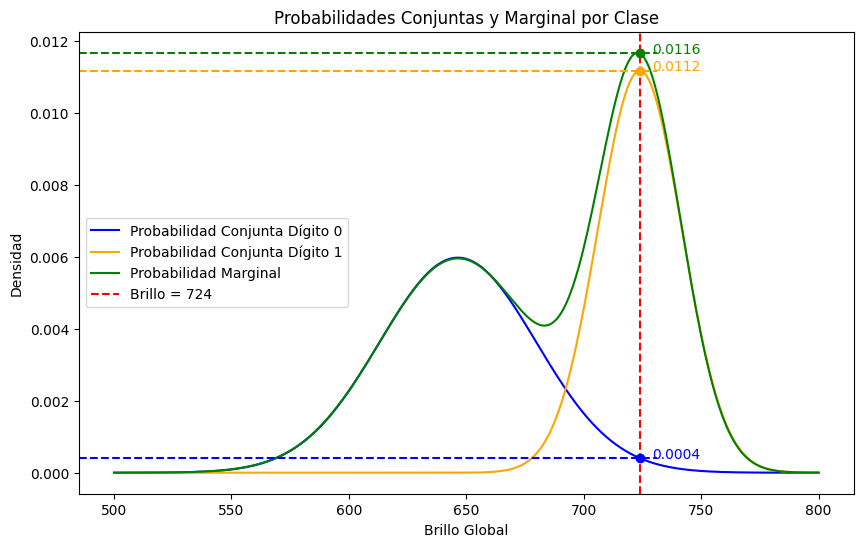

In [27]:
# Crear la figura
plt.figure(figsize=(10, 6))

# Graficar las funciones de densidad probabilística gaussianas
x_values = np.linspace(500, 800, 300)

pdf_0 = np.array(prob_condicional_lista(x_values, mean_0, std_0))
pdf_1 = np.array(prob_condicional_lista(x_values, mean_1, std_1))

plt.plot(x_values, pdf_0 * prior_0, label='Probabilidad Conjunta Dígito 0', color='blue')
plt.plot(x_values, pdf_1 * prior_1, label='Probabilidad Conjunta Dígito 1', color='orange')

# Graficar la probabilidad marginal
prob_marginal_values = prob_marginal_lista(x_values, prioris, mean_ds, std_ds)
plt.plot(x_values, prob_marginal_values, label='Probabilidad Marginal', color='green')

# Obtener las probabilidades en x=724 para ambas distribuciones
y_0 = stats.norm.pdf(724, mean_0, std_0) * prior_0
y_1 = stats.norm.pdf(724, mean_1, std_1) * prior_1
y_marginal = prob_marginal(724, prioris, mean_ds, std_ds)

# Marcar el punto 724 en ambas distribuciones con un marcador
plt.scatter(724, y_0, color='blue', zorder=5)  # Para la curva del Dígito 0
plt.scatter(724, y_1, color='orange', zorder=5)  # Para la curva del Dígito 1
plt.scatter(724, y_marginal, color='green', zorder=5)  # Para la curva de la probabilidad marginal

# Añadir una línea vertical desde el eje x=724
plt.axvline(x=724, color='red', linestyle='--', label='Brillo = 724')

# Dibujar líneas horizontales desde el punto hasta el eje y (para las probabilidades)
plt.axhline(y=y_0, xmin=0, xmax=(724-500)/(800-500), color='blue', linestyle='--')  # Para la curva del Dígito 0
plt.axhline(y=y_1, xmin=0, xmax=(724-500)/(800-500), color='orange', linestyle='--')  # Para la curva del Dígito 1
plt.axhline(y=y_marginal, xmin=0, xmax=(724-500)/(800-500), color='green', linestyle='--')  # Para la curva de la probabilidad marginal

# Etiquetar las probabilidades en el gráfico
plt.text(724 + 5, y_0, f'{y_0:.4f}', color='blue', ha='left')
plt.text(724 + 5, y_1, f'{y_1:.4f}', color='orange', ha='left')
plt.text(724 + 5, y_marginal, f'{y_marginal:.4f}', color='green', ha='left')

# Etiquetas para los ejes
plt.xlabel('Brillo Global')
plt.ylabel('Densidad')
plt.title('Probabilidades Conjuntas y Marginal por Clase')

# Agregar leyenda
plt.legend()

# Mostrar gráfico
plt.show()

### 8. Cálculo de la Probabilidad a Posteriori

Calcule las probabilidades a posteriori para cada clase usando la regla de Bayes. Implemente la función correspondiente y replique la Figura5.

Si X es un arreglo de N datos, la función `prob_posteriori` debe devolver una matriz de Nx2, siendo los valores en cada fila, las probabilidades de pertenencia a las clases para cada dato.

**FUNCION DE PROBABILIDA POSTERIORI LISTA**

In [28]:
def prob_posteriori_lista(X, prioris, mean_ds, std_ds):
    posterioris = []
    for x in X:
        prob_conjuntas = [prob_conjunta(x, p_priori, mean_d, std_d) for p_priori, mean_d, std_d in zip(prioris, mean_ds, std_ds)]
        prob_marginal = sum(prob_conjuntas)
        posteriori = [prob_conjunta / prob_marginal for prob_conjunta in prob_conjuntas]
        posterioris.append(posteriori)
    return np.array(posterioris)

# Ejemplo de uso
X_list = [724, 727, 710]
prioris = (0.5, 0.5)
mean_ds = (646.443, 723.7558)
std_ds = (33.5019, 17.744)
posterioris = prob_posteriori_lista(X_list, prioris, mean_ds, std_ds)
print(posterioris)

[[0.03505748 0.96494252]
 [0.02903548 0.97096452]
 [0.10578062 0.89421938]]


In [29]:
def prob_posteriori_lista(X, prioris, mean_ds, std_ds):
    posterioris = []
    for x in X:
        prob_conjuntas = [prob_conjunta(x, p_priori, mean_d, std_d) for p_priori, mean_d, std_d in zip(prioris, mean_ds, std_ds)]
        proba_marginal = prob_marginal(x, prioris, mean_ds, std_ds)
        posteriori = [prob_conjunta / proba_marginal for prob_conjunta in prob_conjuntas]
        posterioris.append(posteriori)
    return np.array(posterioris)

# Ejemplo de uso
X_list = [724, 727, 710]
prioris = (0.5, 0.5)
mean_ds = (646.443, 723.7558)
std_ds = (33.5019, 17.744)
posterioris = prob_posteriori_lista(X_list, prioris, mean_ds, std_ds)
print(posterioris)

[[0.03505748 0.96494252]
 [0.02903548 0.97096452]
 [0.10578062 0.89421938]]


In [30]:
def prob_posteriori(x, prioris, mean_ds, std_ds):
    prob_conjuntas = [prob_conjunta(x, p_priori, mean_d, std_d) for p_priori, mean_d, std_d in zip(prioris, mean_ds, std_ds)]
    prob_marginal = sum(prob_conjuntas)
    posteriori = [round(prob_conjunta / prob_marginal, 3) for prob_conjunta in prob_conjuntas]
    return np.array(posteriori)

# Ejemplo de uso
x = 724
prioris = (0.5, 0.5)
mean_ds = (646.443, 723.7558)
std_ds = (33.5019, 17.744)
posteriori = prob_posteriori(x, prioris, mean_ds, std_ds)
print(posteriori)

[0.035 0.965]


In [31]:
# test prob_posteriori
prioris = (0.5,0.5)
mean_ds = (646.443, 723.7558)
std_ds = (33.5019, 17.744)
# X = 724 tiene mayor probabilidad de pertenecer a la clase 1
assert np.allclose(prob_posteriori( 724, prioris, mean_ds, std_ds), np.array([0.035, 0.965]))

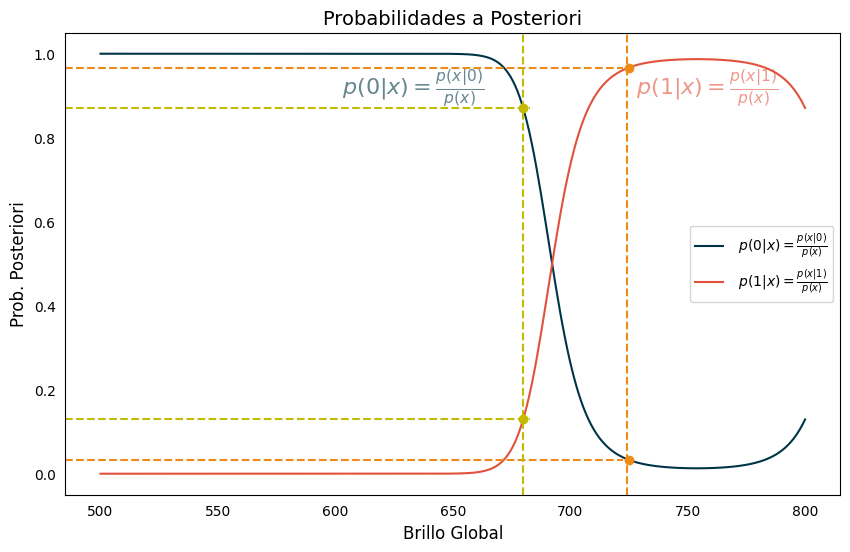

In [32]:
# Datos hipotéticos basados en tu descripción, reemplaza con los valores reales
x_values = np.linspace(500, 800, 300)  # Ejemplo de datos de brillo global
sev = prob_posteriori_lista(x_values, prioris, mean_ds, std_ds)

prob_clase_0 = sev[:, 0]  # Probabilidades a posteriori de la clase 0
prob_clase_1 = sev[:, 1]  # Probabilidades a posteriori de la clase 1

# Crear la figura y las líneas de probabilidad
plt.figure(figsize=(10, 6))
plt.plot(x_values, prob_clase_0, color='#003547', label=r'$\ p(0|x) = \frac{p(x|0)}{p(x)}$')
plt.plot(x_values, prob_clase_1, color='#E1523D', label=r'$\ p(1|x) = \frac{p(x|1)}{p(x)}$')

# Marcar los puntos de interés
posteriori = prob_posteriori(680, prioris, mean_ds, std_ds)
plt.scatter(680, posteriori[0], color='#C2BB00', zorder=5)
plt.scatter(680, posteriori[1], color='#C2BB00', zorder=5)

# Dibujar líneas horizontales desde el punto hasta el eje y (para las probabilidades)
plt.axhline(y=posteriori[0], xmin=0, xmax=0.6, color='#C2BB00', linestyle='--')
plt.axhline(y=posteriori[1], xmin=0, xmax=0.6, color='#C2BB00', linestyle='--')

posteriori = prob_posteriori(725, prioris, mean_ds, std_ds)
plt.scatter(725, posteriori[0], color='#ED8B16', zorder=5)
plt.scatter(725, posteriori[1], color='#ED8B16', zorder=5)

# Dibujar líneas horizontales desde el punto hasta el eje y (para las probabilidades)
plt.axhline(y=posteriori[0], xmin=0, xmax=0.72, color='#ED8B16', linestyle='--')
plt.axhline(y=posteriori[1], xmin=0, xmax=0.72, color='#ED8B16', linestyle='--')

# Líneas verticales en puntos específicos
plt.axvline(x=680, color='#C2BB00', linestyle='--')
plt.axvline(x=724, color='#ED8B16', linestyle='--')

# Agregar texto en el gráfico
plt.text(600, 0.9, r'$\ p(0|x) = \frac{p(x|0)}{p(x)}$', fontsize=16, color='#003547', alpha=0.6)
plt.text(725, 0.9, r'$\ p(1|x) = \frac{p(x|1)}{p(x)}$', fontsize=16, color='#E1523D', alpha=0.6)

# Etiquetas de ejes y título
plt.xlabel('Brillo Global', fontsize=12)
plt.ylabel('Prob. Posteriori', fontsize=12)
plt.title('Probabilidades a Posteriori', fontsize=14)

# Configuración para eliminar las líneas y etiquetas predeterminadas de los ejes
plt.tick_params(left=False, bottom=False)  # Eliminar las marcas de los ejes
# Leyenda
plt.legend()
# Mostrar gráfico
#plt.grid(True)  # Si quieres mantener la cuadrícula, de lo contrario coméntala
plt.show()

Con las probabilidades a posteriori calculadas, Obtenga las predicciones con los datos de prueba y compárelas con sus etiquetas. Utilice [np.argmax](https://numpy.org/doc/stable/reference/generated/numpy.argmax.html)

Qué desempeño en tasa de aciertos obtiene?

In [33]:
# Calcular las probabilidades a posteriori para los datos de prueba
posterioris_test = prob_posteriori_lista(X_test_brillo['brillo_global'], prioris, mean_ds, std_ds)

# Obtener las predicciones a partir de las probabilidades a posteriori
predicciones = np.argmax(posterioris_test, axis=1)
print(predicciones)

# Comparar las predicciones con las etiquetas reales
tasa_aciertos = np.mean(predicciones == y_test)
print(f"Tasa de aciertos: {tasa_aciertos * 100:.2f}%")

[0 1 0 1 0 0 0 0 1 0 1 1 1 0 0 0 1 1 1 0 0 1 1 1 1 0 1 0 0 1 0 0 1 1 0 0 0
 0 0 0 0 0 1 0 1 1 1 1 0 0 0 1 0 0 0 0 0 0 1 0 0 0 0 1 0 0 1 1 1 0 0 0 1 1
 1 1 0 0 1 1 1 1 0 0 0 1 1 1 0 1 0 0 1 1 0 1 0 1 0 0 0 0 1 1 0 1 1 1 0 1 1
 1 0 1 0 0 1 0 0 1 0 1 0 1 0 0 0 1 0 1 0 1 0 1 1 0 1 1 0 1 0 1 0 1 1 1 0 1
 0 0 0 1 1 0 0 1 0 0 0 1 1 1 0 1 0 0 0 0 0 1 1 1 0 0 1 0 1 1 0 0 0 0 1 0 1
 1 0 1 1 0 0 0 1 1 0 1 0 1 0 1 0 1 1 1 0 0 1 0 1 0 0 0 1 1 0 1 0 0 0 0 1 1
 0 1 1 1 1 1 1 0 1 1 1 0 1 0 0 1 1 0 0 0 0 1 0 1 1 0 0 0 1 1 0 1 1 0 1 1 1
 1 0 1 0 0 1 1 0 0 0 1 1 0 0 1 1 1 1 1 1 1 1 1 1 1 0 0 0 1 0 1 0 0 1 0 1 0
 0 0 1 1 0 0 1 1 1 1 1 1 0 1 0 0 0 0 0 0 0 0 0 1 1 0 0 0 1 0 1 0 0 1 1 1 0
 0 1 1 0 1 1 1 0 0 1 0 1 0 1 1 0 1 0 1 0 1 0 0 1 0 0 1 1 1 0 0 0 0 1 1 0 0
 1 1 1 1 1 0 0 1 0 1 1 0 1 1 0 0 1 1 0 1 1 1 1 1 1 0 1 0 1 1 0 1 1 1 1 1 1
 0 1 1 0 1 1 1 0 1 1 1 1 1 0 0 0 1 1 0 0 0 0 1 0 1 0 0 1 0 0 0 1 1 0 0 1 1
 1 0 1 0 0 0 0 0 0 1 1 1 0 1 0 1 0 1 1 1 0 1 0 0 1 0 0 1 1 1 1 1 1 0 0 1 1
 0 0 0 1 0 0 1 1 0 1 0 0 

### 10. Scikit Learn
Compare el desempeño obtenido usando la clase [GaussianNB](https://scikit-learn.org/stable/modules/generated/sklearn.naive_bayes.GaussianNB.html#sklearn.naive_bayes.GaussianNB)

In [34]:
from sklearn.naive_bayes import GaussianNB

# Crear el modelo GaussianNB
gnb = GaussianNB()

# Entrenar el modelo con los datos de entrenamiento
gnb.fit(X_train_brillo, y_train)

# Realizar predicciones con los datos de prueba
y_pred = gnb.predict(X_test_brillo)

# Calcular la tasa de aciertos
tasa_aciertos_sklearn = np.mean(y_pred == y_test)
print(f"Tasa de aciertos con sklearn: {tasa_aciertos_sklearn * 100:.2f}%")

Tasa de aciertos con sklearn: 93.67%
